In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [5]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001A0B7559A90>

In [8]:
# Read an Image

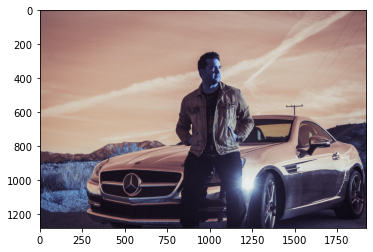

In [9]:
img = cv2.imread('freddy-kearney-8bvD2GbIm_Q-unsplash.jpg')
plt.imshow(img)

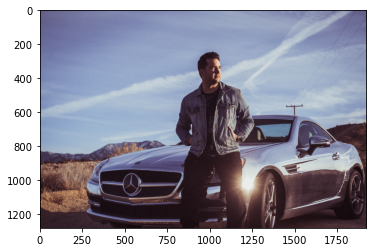

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold= 0.5)

In [12]:
print(ClassIndex)

[1 3]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale= font_scale, color=(0, 255, 255),thickness=3)

In [14]:
# Image Classification

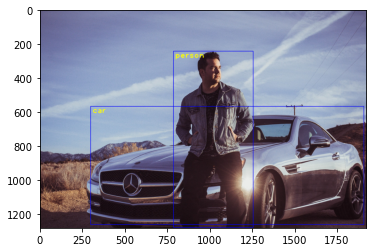

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
# Video Demo

In [16]:
cap = cv2.VideoCapture('Pexels Videos 4698.mp4')

#Check if video is opened 

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError('Can not open video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidence, bbox= model.detect(frame, confThreshold= 0.55)
    print(ClassIndex)
    if(len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd <= 80):
                cv2.rectangle(frame, boxes, (255,0,0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale= font_scale, color=(0, 255, 255),thickness=3) 
    cv2.imshow('Object Detection Demo', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


[1 1 1]
[1 1 1]
[1 1 1 3]
[1 1 1 3]
[1 1 1 3]
[1 1 3 1]
[1 1 1 3]
[1 1 1 3]
[1 1 3 1]
[1 1 3 1]
[1 1 3]
[1 1 3]
[1 1 3]
[1 1 1 3]
[1 1 3]
[1 3 1]
[1 3 1]
[1 3 1 1]
[1 3 1 1]
[1 3 1 1]
[1 3 1 1]
[1 1 3 3 3]
[ 1  1  3  3 10  1]
[1 3 1 1]
[1 1 3 1]
[1 1 3 1 1]
[ 1  1  3  1  1 10]
[1 3 1 1 1 3 3 3 3]
[1 3 3 3 1 1 3 1]
[1 3 3 1 3 3 3 3]
[ 1  3  3  1  1 10  1]
[ 1  3  1  1  1 10]
[ 1  3  1  1 10]
[1 3 1 1]
[3 1 1]
[ 1  3  1 10]
[ 3  1  1 10]
[ 3  1  1 10]
[ 3  1  1 10]
[3 1 1]
[3 1 1]
[3 1 1]
[ 3 10]
[ 3 10]
[ 3 10]
[ 3  1 10  1]
[ 3  1  3 10  1]
[ 3  1  3  1 10  1]
[ 3  1  1  1  1 10]
[ 3  1  1  1 10  1  3]
[ 3  1  1  1  1  3 10]
[3 1 1 1 1 3]
[3 1 1 1 1 3 1]
[3 1 1 1 3 1]
[3 1 1 1 3]
[3 1 1 1 1 3]
[3 1 1 1 1 3 1]
[3 1 1 1 1 3 1]
[3 1 1 1 1 3 1]
[3 1 1 1 1 1 3]
[3 1 1 1 1 3 1]
[3 1 1 1 1 3]
[3 1 1 1 3 1]
[3 1 1 1 3 1 1]
[3 1 1 1 1 3 1 1]
[3 1 1 1 1 3 1]
[3 1 1 1 3 1]
[1 1 3 1 3 1]
[1 1 3 1 3 1]
[1 1 3 3 1]
[1 1 3 1 1]
[1 1 3 1 1]
[1 1 3 3 1 1]
[1 1 1 3 1]
[1 1 3 1 1]
[1 1 3 1 1]
[1 1 1 3 1]

KeyboardInterrupt: 

In [17]:
## Webcam Demo

In [18]:
cap = cv2.VideoCapture(0)

#Check if video is opened 

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError('Can not open webcam')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidence, bbox= model.detect(frame, confThreshold= 0.55)
    print(ClassIndex)
    if(len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd <= 80):
                cv2.rectangle(frame, boxes, (255,0,0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale= font_scale, color=(0, 255, 255),thickness=3) 
    cv2.imshow('Object Detection Demo', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 75]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 75]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 75]
[ 1 75]
[ 1 75]
[ 1 75]
[ 1 75 77]
[ 1 75]
[ 1 75]
[75  1]
[75  1]
[ 1 75]
[ 1 75]
[75  1]
[75  1]
[75  1]
[75  1]
[75  1 77]
[75  1 77]
[ 1 77 75]
[ 1 77]
[ 1 77]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
[1]
[ 1 77]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 

KeyboardInterrupt: 

In [ ]:
END